In [1]:
import sys
import os

# Add the project directory to sys.path
project_path = "/Users/hugocontrerasp/Documents/MORIA_AI_LABS/moria_data_readiness_engine"
if project_path not in sys.path:
    sys.path.append(project_path)

In [2]:
# Import the function
from moria_engine.analysis.data_transformers import build_common_fields_matrix_kpis, build_common_fields_matrix_schema
from moria_engine.analysis import graph_visualizer,graph_explainer
from moria_engine.data import loaders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyvis.network import Network
import networkx as nx

df_kpis = loaders.load_json_kpis('../data/test/c001_bamfurlong/20250524-hacp-c001_bamfurlong-kpi_details.json')
df_schema = loaders.load_json_schema('../data/test/c001_bamfurlong/20250524-hacp-c001_bamfurlong-data_domains_schema.json')

In [3]:
df_kpis.head()

,kpi_name,domain_name,table_name,field_name
0,Total Revenue,Sales,SalesOrder,TotalAmount
1,Monthly Recurring Revenue,Sales,SalesOrder,TotalAmount
2,Monthly Recurring Revenue,Sales,SalesOrder,OrderDate
3,Average Order Value,Sales,SalesOrder,TotalAmount
4,Average Order Value,Sales,SalesOrder,OrderID


In [4]:
df_schema.head()

,domain_name,table_name,field_name
0,Customer,Customer,CustomerID
1,Customer,Customer,FirstName
2,Customer,Customer,LastName
3,Customer,Customer,Email
4,Customer,Customer,PhoneNumber


In [5]:
M, table_list, d_table_domain, G = build_common_fields_matrix_kpis(df_kpis)

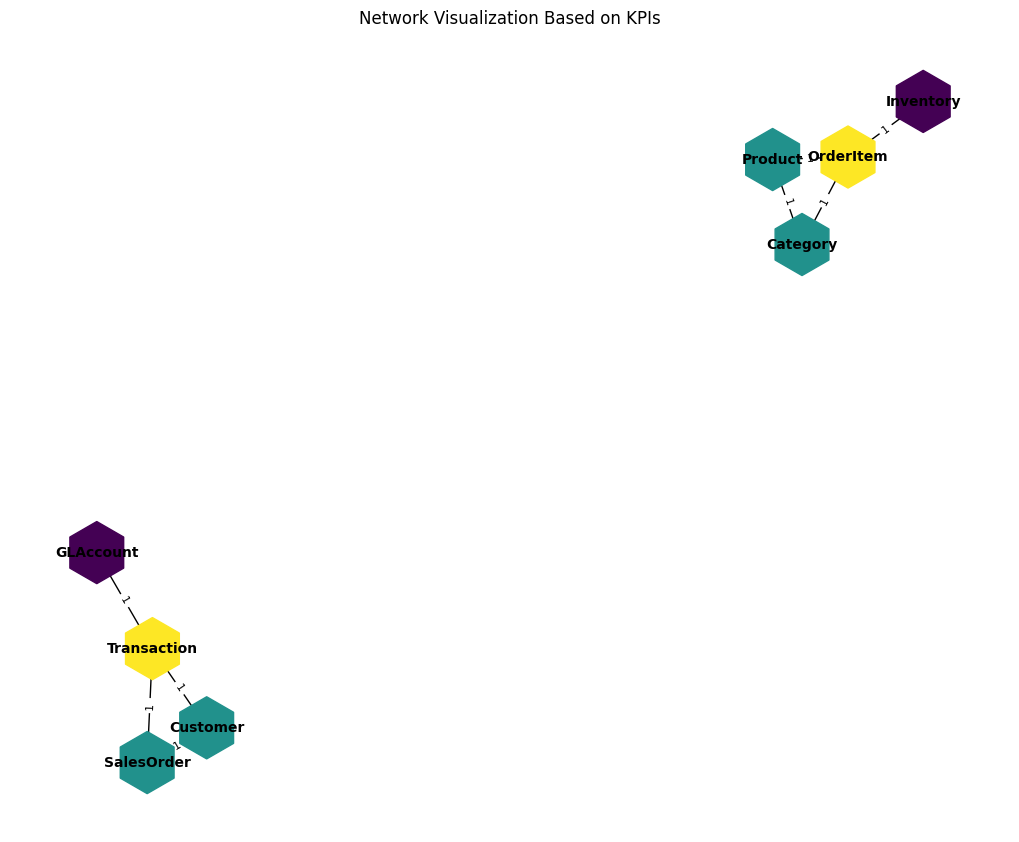

In [6]:
graph_visualizer.visualize_network_kpis(df_kpis)

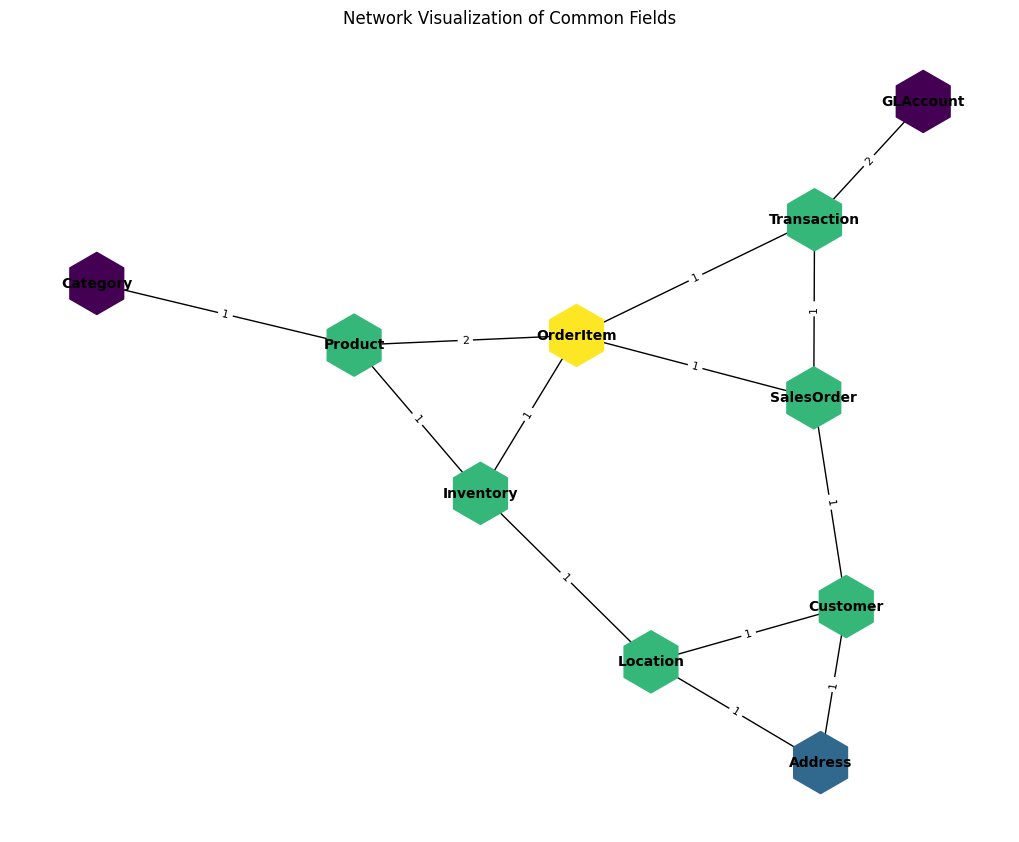

In [7]:
graph_visualizer.visualize_network_schema(df_schema)

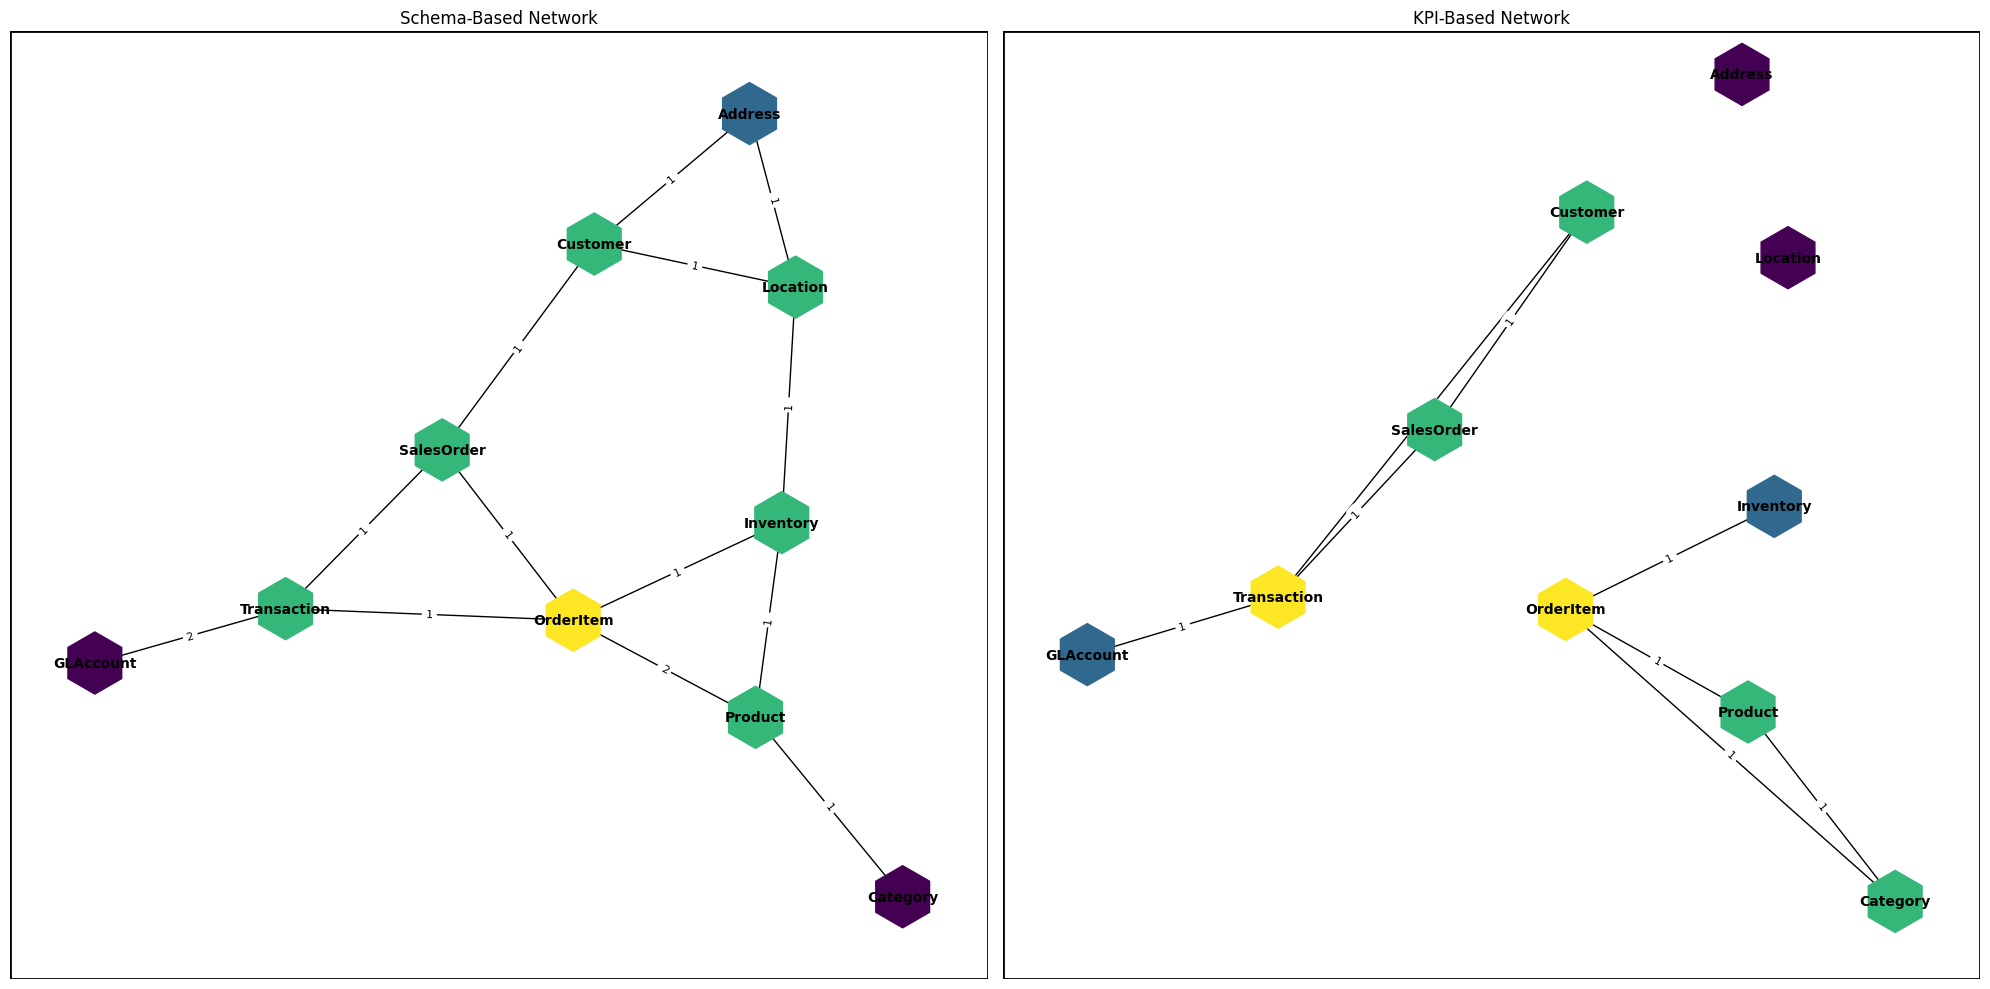

In [13]:
graph_visualizer.visualize_combined_networks1(df_schema, df_kpis)

In [9]:
graph_explainer.graph_centrality_attributes(df_kpis)

,node,domain_name,degree,centrality,betweenness_centrality
0,Category,Product,1,0.142857,0.000000
1,Customer,Customer,1,0.142857,0.000000
2,GLAccount,Finance,0,0.000000,0.000000
3,Inventory,Inventory,2,0.285714,0.000000
4,OrderItem,Sales,2,0.285714,0.000000
5,Product,Product,3,0.428571,0.095238
6,SalesOrder,Sales,1,0.142857,0.000000
7,Transaction,Finance,0,0.000000,0.000000


In [10]:
graph_explainer.graph_centrality_attributes(df_schema)

,node,domain_name,degree,centrality,betweenness_centrality
0,Address,Customer,2,0.222222,0.000000
1,Category,Product,1,0.111111,0.000000
2,Customer,Customer,3,0.333333,0.152778
3,GLAccount,Finance,1,0.111111,0.000000
4,Inventory,Inventory,3,0.333333,0.208333
5,Location,Inventory,3,0.333333,0.152778
6,OrderItem,Sales,4,0.444444,0.305556
7,Product,Product,3,0.333333,0.222222
8,SalesOrder,Sales,3,0.333333,0.208333
9,Transaction,Finance,3,0.333333,0.222222


In [11]:
df_schema['table_name'].unique()

array(['Customer', 'Address', 'Product', 'Category', 'SalesOrder',
       'OrderItem', 'Inventory', 'Location', 'Transaction', 'GLAccount'],
      dtype=object)

In [12]:
df_kpis['table_name'].unique()

array(['SalesOrder', 'Transaction', 'Customer', 'Inventory', 'OrderItem',
       'GLAccount', 'Product', 'Category'], dtype=object)